# Dataset

In [1]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [2]:
dataset_df

,PTTp,PTTf,PTTd,HeartRate,SBP,DBP,AI,LASI,S1,S2,S3,S4
0,0.0883809523809524,0.44000000000000006,2.6733333333333333,125.12695097297141,130.43329604900043,64.68913169835835,0.9922470519252067,2.392,11.784402737047898,4.340562267839687,2.131208602150538,18.303930400782015
1,0.07000000000000002,0.41515789473684217,1.672,123.96177910670554,157.72738151641408,64.38629825186952,0.9177047289504034,3.84,6.033327859237537,7.44174467253177,5.302010557184752,18.826870772238514
2,0.07847619047619048,0.44320000000000004,0.504,121.96242854624663,140.10442869493437,50.98347603952466,0.989021633839199,1.48,3.8016195503421315,2.742877028347996,11.476136070381234,18.06877732160313
3,0.05676190476190477,0.3928000000000001,3.544,129.59047971954195,138.06274513634833,55.58459066198415,0.9848300582474556,0.48,13.149560899315741,0.9034979472140763,4.079298533724341,18.179439296187688
4,0.0712,0.4374736842105264,3.2440000000000007,121.84646571478936,132.6019742786947,55.93626821274539,0.9975117862755369,1.488,6.727907722385142,2.710827761485826,8.864481720430108,18.350898142717497
...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.5011428571428571,0.3822857142857144,2.518857142857143,90.13468008419939,168.8285046099021,97.14496720610043,0.9449321628092577,4.008,8.27980136852395,7.3020715542522,2.2052527859237534,17.840430889540567
4941,0.3381333333333334,0.2661333333333333,4.872571428571429,90.51399808433051,138.18569728798263,78.64674610664025,0.894874694922317,0.504,16.8972715542522,1.0228183773216033,0.8687593352883677,18.837203519061585
4942,0.5068571428571428,0.41599999999999987,1.0426666666666666,90.51821592016374,178.1948408953702,78.07234000152394,0.9983107051241943,2.824,6.2422357771260994,4.815519843597263,7.001963636363637,18.109645356793745
4943,0.29947826086956525,0.20973913043478265,3.3327999999999998,155.74575797668763,113.00553565632205,56.17062845987654,0.997623177233892,7.712,3.030912218963832,15.89653567937439,1.3085294232649072,20.284596676441836


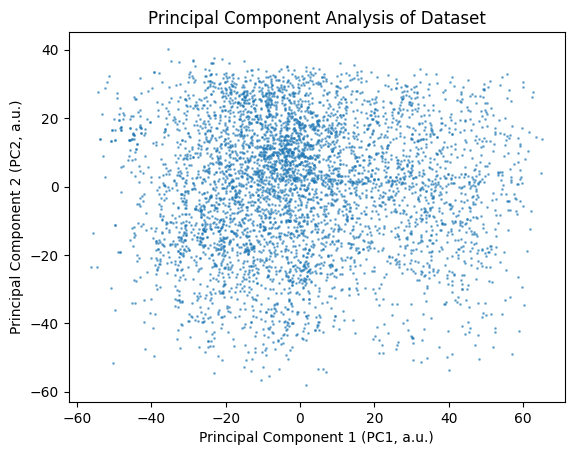

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.show()
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.close()

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

dbp = dataset_df[['DBP']].astype(np.float32)
sbp = dataset_df[['SBP']].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP']).astype(np.float32)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

sbp_scaler = StandardScaler()
sbp_scaled = pd.DataFrame(sbp_scaler.fit_transform(sbp))

dbp_scaler = StandardScaler()
dbp_scaled = pd.DataFrame(dbp_scaler.fit_transform(dbp))

dbp = dbp['DBP']
sbp = sbp['SBP']

K_FOLDS = 5
kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model", plot=True):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    if plot:
        plt.figure(figsize=(5, 5))
        plt.scatter(y_true, y_pred, alpha=0.5, label=label)
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{label} for Calibration Curve")
        plt.legend()
        plt.show()

        errors = y_true - y_pred
        plt.figure(figsize=(6, 5))
        plt.hist(errors, bins=min(round(max(errors) - min(errors)), 40), edgecolor='black', alpha=0.7)
        plt.xlabel("Error (True - Predicted)")
        plt.ylabel("Frequency")
        plt.title(f"Error Distribution for {label}")
        plt.show()
    return r2, mse, rmse, mae

# K-Fold Cross Validation Setup
All models below are evaluated using k-fold cross validation (k=5).

In [6]:
def cross_val_regression(model_cls, X, y, label, model_kwargs=None, scale_X=False, scale_y=False, y_scaler=None, plot=True):
    metrics = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        if scale_X:
            X_scaler = StandardScaler()
            X_train = X_scaler.fit_transform(X[train_idx])
            X_test = X_scaler.transform(X[test_idx])
        else:
            X_train = X[train_idx]
            X_test = X[test_idx]
        if scale_y and y_scaler is not None:
            y_train = y_scaler.fit_transform(y[train_idx].reshape(-1, 1)).flatten()
            y_test = y_scaler.transform(y[test_idx].reshape(-1, 1)).flatten()
        else:
            y_train = y[train_idx]
            y_test = y[test_idx]
        model = model_cls(**(model_kwargs or {}))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if scale_y and y_scaler is not None:
            # Inverse transform predictions for reporting
            y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
            y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        # Only plot for the first fold
        r2, mse, rmse, mae = evaluate_regression(y_test, y_pred, label=f"{label} (Fold {fold+1})", plot=(plot and fold==0))
        metrics.append([r2, mse, rmse, mae])
    metrics = np.array(metrics)
    print(f"\n{label} Mean ± Std over {K_FOLDS} folds:")
    print(f"R^2: {metrics[:,0].mean():.4f} ± {metrics[:,0].std():.4f}")
    print(f"MSE: {metrics[:,1].mean():.4f} ± {metrics[:,1].std():.4f}")
    print(f"RMSE: {metrics[:,2].mean():.4f} ± {metrics[:,2].std():.4f}")
    print(f"MAE: {metrics[:,3].mean():.4f} ± {metrics[:,3].std():.4f}")

# Linear Regression

                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 1)  0.004322  51.436241  7.171906  5.611979


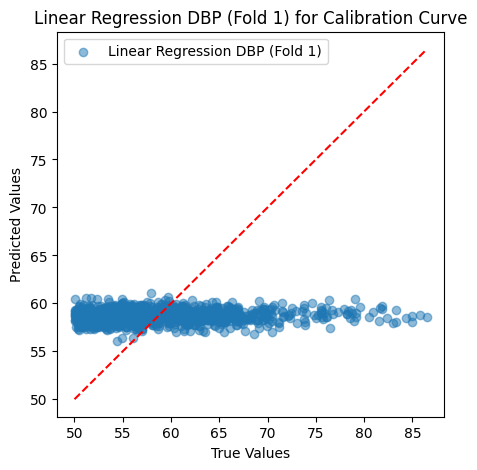

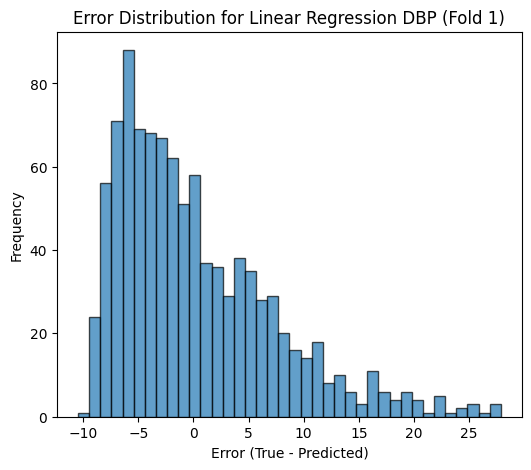

                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 2)  0.006511  56.998058  7.549706  5.907917
                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 3) -0.006297  52.783413  7.265219  5.697246
                            Model       R^2        MSE      RMSE       MAE
0  Linear Regression DBP (Fold 4)  0.008525  57.430763  7.578309  5.745246
                            Model       R^2        MSE      RMSE      MAE
0  Linear Regression DBP (Fold 5)  0.000265  54.564163  7.386756  5.77011

Linear Regression DBP Mean ± Std over 5 folds:
R^2: 0.0027 ± 0.0053
MSE: 54.6425 ± 2.3266
RMSE: 7.3904 ± 0.1576
MAE: 5.7465 ± 0.0971


In [7]:
from sklearn.linear_model import LinearRegression

# DBP
cross_val_regression(LinearRegression, X.values, dbp.values, label="Linear Regression DBP", plot=True)

                            Model       R^2         MSE       RMSE       MAE
0  Linear Regression SBP (Fold 1)  0.011553  358.866608  18.943775  15.62141


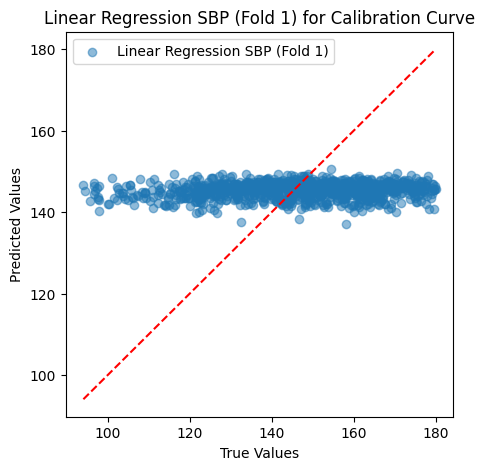

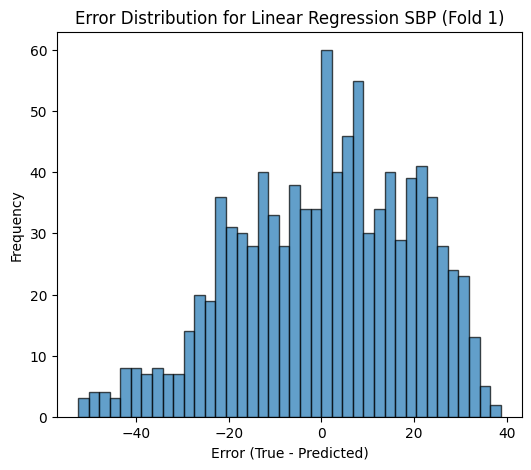

                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 2)  0.003547  355.704956  18.860142  15.701054
                            Model       R^2        MSE       RMSE        MAE
0  Linear Regression SBP (Fold 3)  0.003142  378.03772  19.443192  15.907565
                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 4) -0.001851  359.860718  18.969995  15.697351
                            Model       R^2         MSE       RMSE        MAE
0  Linear Regression SBP (Fold 5)  0.007162  361.681824  19.017935  15.623231

Linear Regression SBP Mean ± Std over 5 folds:
R^2: 0.0047 ± 0.0045
MSE: 362.8304 ± 7.8471
RMSE: 19.0470 ± 0.2046
MAE: 15.7101 ± 0.1045


In [8]:
# SBP
cross_val_regression(LinearRegression, X.values, sbp.values, label="Linear Regression SBP", plot=True)

# Random Forest Regressor

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 1)  0.009585  51.164335  7.152925  5.590826


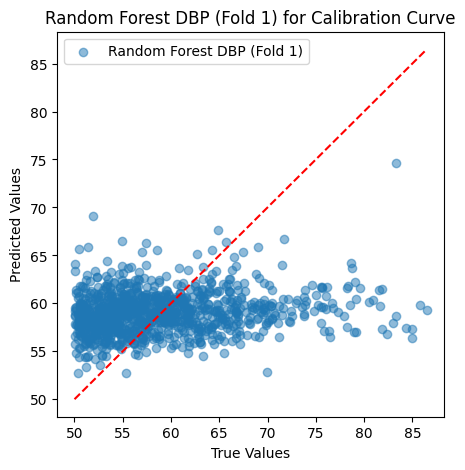

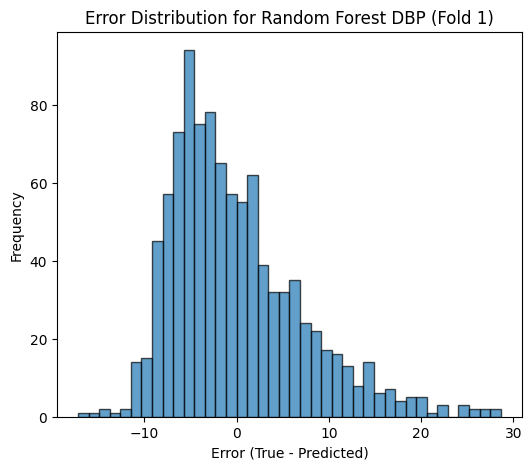

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 2)  0.031361  55.572419  7.454691  5.876794
                        Model      R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 3) -0.00839  52.893216  7.272772  5.743516
                        Model      R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 3) -0.00839  52.893216  7.272772  5.743516
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 4)  0.060944  54.394388  7.375255  5.647434
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 4)  0.060944  54.394388  7.375255  5.647434
                        Model      R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 5)  0.03861  52.471379  7.243713  5.670658

Random Forest DBP Mean ± Std over 5 folds:
R^2: 0.0264 ± 0.0239
MSE: 53.2991 ± 1.5346
RMSE: 7.2999 ± 0.1050
MAE: 5.7058 ± 0.0985
                        

In [9]:
from sklearn.ensemble import RandomForestRegressor

# DBP
cross_val_regression(RandomForestRegressor, X.values, dbp.values, label="Random Forest DBP", model_kwargs={'n_estimators':100, 'random_state':42})

                        Model       R^2         MSE      RMSE       MAE
0  Random Forest SBP (Fold 1)  0.137965  312.971135  17.69099  14.01517


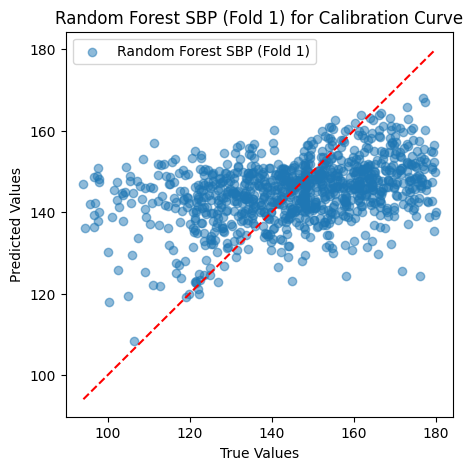

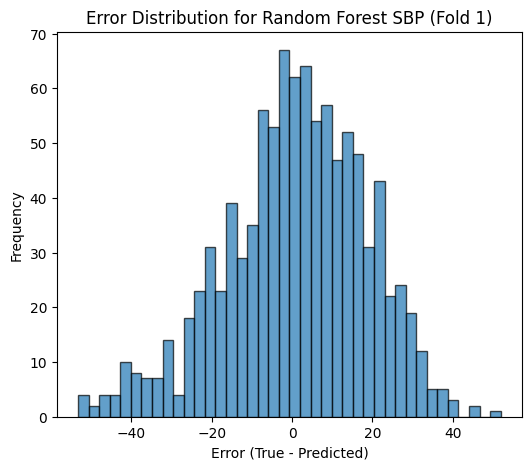

                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 2)  0.160815  299.564685  17.307937  13.806813
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 3)  0.157613  319.457848  17.873384  14.108717
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 3)  0.157613  319.457848  17.873384  14.108717
                        Model       R^2        MSE       RMSE        MAE
0  Random Forest SBP (Fold 4)  0.158291  302.33816  17.387874  13.826061
                        Model       R^2        MSE       RMSE        MAE
0  Random Forest SBP (Fold 4)  0.158291  302.33816  17.387874  13.826061
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 5)  0.135855  314.800061  17.742606  14.214736

Random Forest SBP Mean ± Std over 5 folds:
R^2: 0.1501 ± 0.0108
MSE: 309.8264 ± 7.5996
RMSE: 17.6006 ± 0.2162
MAE: 

In [10]:
# SBP
cross_val_regression(RandomForestRegressor, X.values, sbp.values, label="Random Forest SBP", model_kwargs={'n_estimators':100, 'random_state':42})

# XGBoost Regressor

                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 1) -0.151842  59.503563  7.713855  5.872109


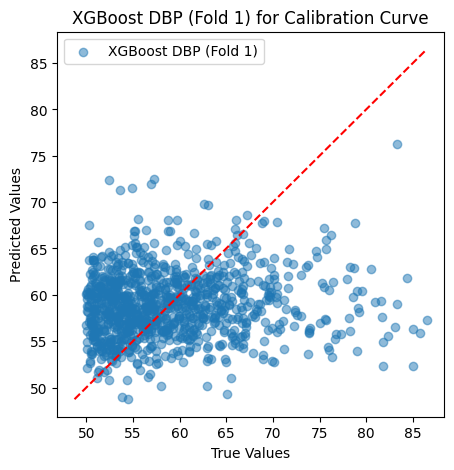

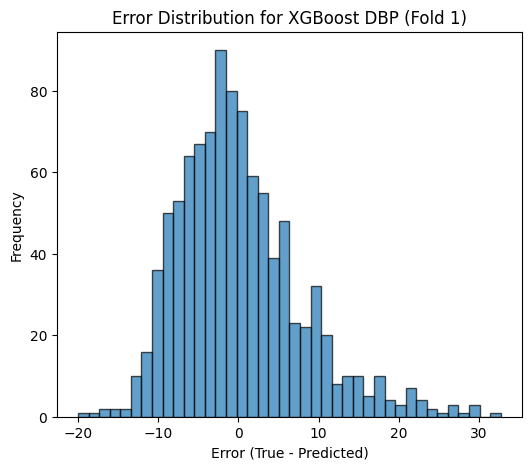

                  Model      R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 2) -0.07903  61.905716  7.868019  6.084198
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 3) -0.150532  60.349022  7.768463  5.967882
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 3) -0.150532  60.349022  7.768463  5.967882
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 4) -0.057866  61.276375  7.827923  5.905181
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 4) -0.057866  61.276375  7.827923  5.905181
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 5) -0.070238  58.412121  7.642782  5.862269

XGBoost DBP Mean ± Std over 5 folds:
R^2: -0.1019 ± 0.0408
MSE: 60.2894 ± 1.2435
RMSE: 7.7642 ± 0.0802
MAE: 5.9383 ± 0.0818
                  Model       R^2        MSE      RMSE       MAE
0  XGBoost DBP (Fold 5) -0.07023

In [11]:
from xgboost import XGBRegressor

# DBP
cross_val_regression(XGBRegressor, X.values, dbp.values, label="XGBoost DBP", model_kwargs={'random_state':42})

                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 1)  0.021112  355.395874  18.851946  14.797199


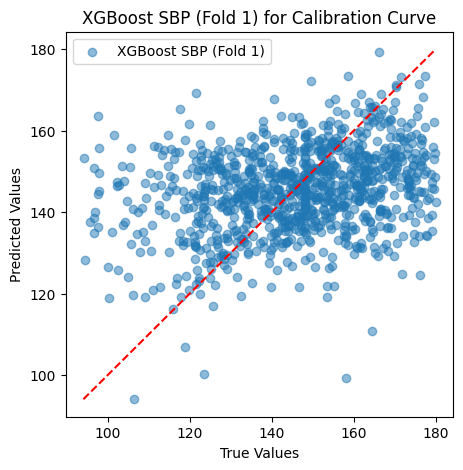

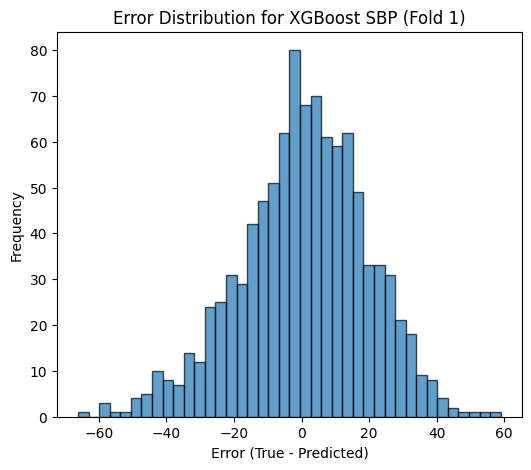

                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 2)  0.004598  355.329742  18.850193  14.764399
                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 3)  0.091708  344.450714  18.559383  14.858233
                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 3)  0.091708  344.450714  18.559383  14.858233
                  Model      R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 4)  0.05603  339.070068  18.413855  14.784254
                  Model      R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 4)  0.05603  339.070068  18.413855  14.784254
                  Model       R^2         MSE       RMSE        MAE
0  XGBoost SBP (Fold 5) -0.002316  365.134613  19.108496  15.016072

XGBoost SBP Mean ± Std over 5 folds:
R^2: 0.0342 ± 0.0351
MSE: 351.8762 ± 9.1568
RMSE: 18.7568 ± 0.2442
MAE: 14.8440 ± 0.0916
                  Model       R^2         MSE       RMSE     

In [12]:
# SBP
cross_val_regression(XGBRegressor, X.values, sbp.values, label="XGBoost SBP", model_kwargs={'random_state':42})

# Support Vector Machine

              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 1) -0.075624  55.566212  7.454275  5.474446


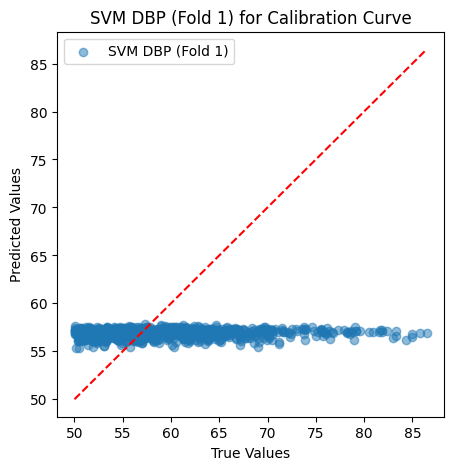

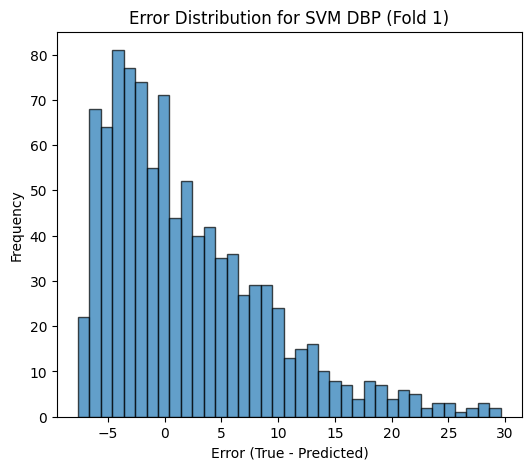

              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 2) -0.079481  61.931607  7.869664  5.830429
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 3) -0.046245  54.878805  7.408023  5.438871
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 3) -0.046245  54.878805  7.408023  5.438871
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 4) -0.044566  60.506024  7.778562  5.535605
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 4) -0.044566  60.506024  7.778562  5.535605
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 5) -0.051057  57.365252  7.573985  5.598049

SVM DBP Mean ± Std over 5 folds:
R^2: -0.0594 ± 0.0150
MSE: 58.0496 ± 2.7493
RMSE: 7.6169 ± 0.1800
MAE: 5.5755 ± 0.1385
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 5) -0.051057  57.365252  7.573985  5.598049

SVM DBP Mean ± Std over 

In [13]:
from sklearn.svm import SVR

# DBP
cross_val_regression(SVR, X.values, dbp.values, label="SVM DBP", model_kwargs={'kernel':'rbf'})

              Model       R^2         MSE      RMSE        MAE
0  SVM SBP (Fold 1) -0.006788  365.525451  19.11872  15.536955


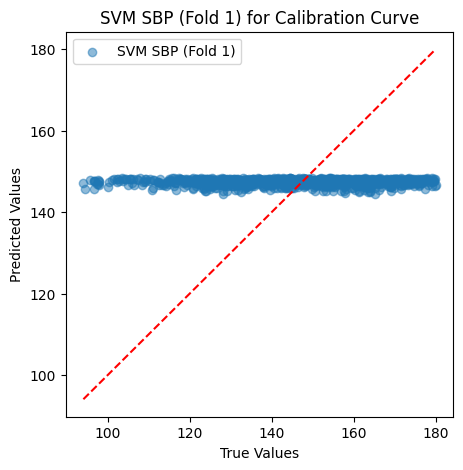

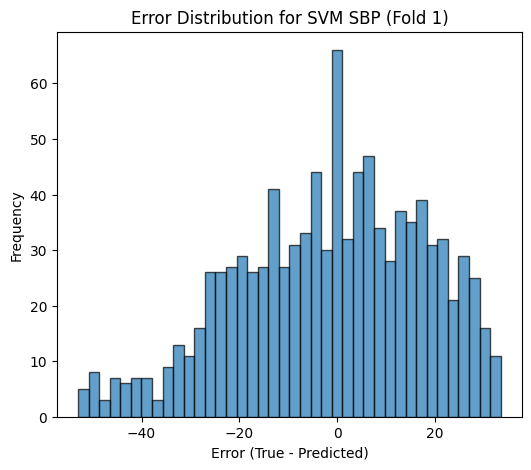

              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 2) -0.000729  357.231436  18.900567  15.435913
              Model       R^2         MSE      RMSE        MAE
0  SVM SBP (Fold 3) -0.016778  385.591752  19.63649  15.706822
              Model       R^2         MSE      RMSE        MAE
0  SVM SBP (Fold 3) -0.016778  385.591752  19.63649  15.706822
              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 4) -0.017358  365.430503  19.116237  15.466001
              Model       R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 4) -0.017358  365.430503  19.116237  15.466001
              Model       R^2        MSE       RMSE        MAE
0  SVM SBP (Fold 5) -0.020017  371.58278  19.276483  15.609565

SVM SBP Mean ± Std over 5 folds:
R^2: -0.0123 ± 0.0073
MSE: 369.0724 ± 9.4366
RMSE: 19.2097 ± 0.2446
MAE: 15.5511 ± 0.0984
              Model       R^2        MSE       RMSE        MAE
0  SVM SBP (Fold 5) -0.020017  371.58278  19.276483

In [14]:
# SBP
cross_val_regression(SVR, X.values, sbp.values, label="SVM SBP", model_kwargs={'kernel':'rbf'})

# Multilayer Perceptron Regressor

              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 1) -0.042803  53.870693  7.339666  5.547037


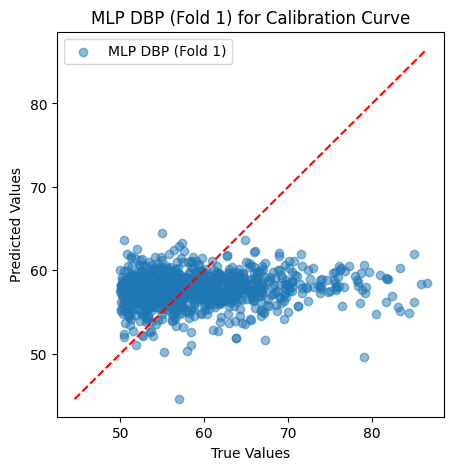

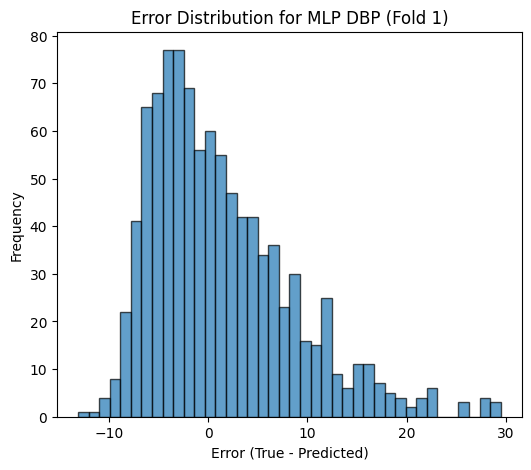

              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 2) -0.111933  63.793396  7.987077  6.543752
              Model      R^2        MSE     RMSE       MAE
0  MLP DBP (Fold 3) -0.07986  56.642036  7.52609  5.594497
              Model      R^2        MSE     RMSE       MAE
0  MLP DBP (Fold 3) -0.07986  56.642036  7.52609  5.594497
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 4) -0.069773  61.966129  7.871857  6.209191
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 4) -0.069773  61.966129  7.871857  6.209191
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 5) -0.069964  58.397179  7.641805  5.943889

MLP DBP Mean ± Std over 5 folds:
R^2: -0.0749 ± 0.0223
MSE: 58.9339 ± 3.5773
RMSE: 7.6733 ± 0.2332
MAE: 5.9677 ± 0.3760
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 5) -0.069964  58.397179  7.641805  5.943889

MLP DBP Mean ± Std over 5 folds:

In [15]:
from sklearn.neural_network import MLPRegressor

MLP_HIDDEN_LAYER_SIZES = (64, 64, 32, 16)
MLP_MAX_ITER = 500

# DBP
cross_val_regression(MLPRegressor, X.values, dbp.values, label="MLP DBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 1) -0.102575  400.301758  20.007542  16.536158


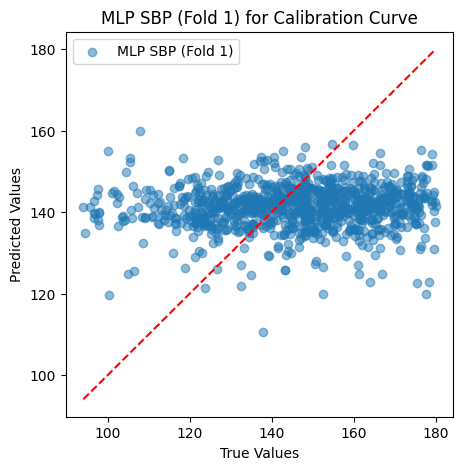

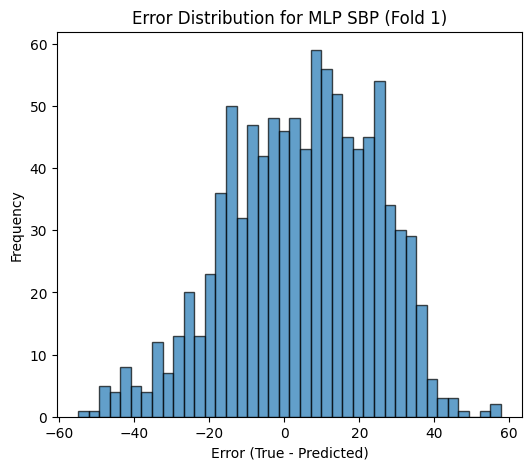

              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 2) -0.066073  380.557312  19.507877  16.156551
              Model      R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 3) -0.02497  388.698547  19.715439  16.119383
              Model      R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 3) -0.02497  388.698547  19.715439  16.119383
              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 4) -0.050487  377.330444  19.424995  16.034546
              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 4) -0.050487  377.330444  19.424995  16.034546
              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 5) -0.057926  385.392761  19.631422  16.024822

MLP SBP Mean ± Std over 5 folds:
R^2: -0.0604 ± 0.0252
MSE: 386.4562 ± 7.9490
RMSE: 19.6575 ± 0.2015
MAE: 16.1743 ± 0.1877
              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 5) -0.057926  385.392761  19.63

In [16]:
# SBP
cross_val_regression(MLPRegressor, X.values, sbp.values, label="MLP SBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

## Multilayer Perceptron w/ Scaled X

                         Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X) (Fold 1) -0.087262  56.167397  7.494491  5.682074


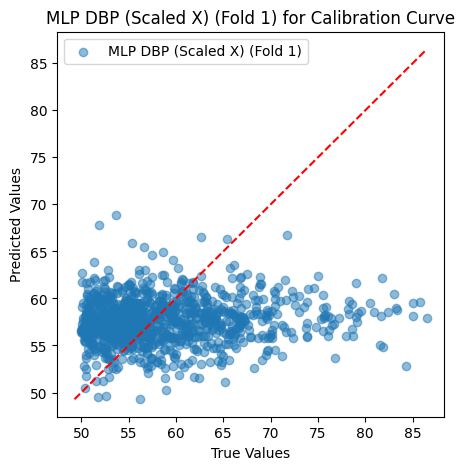

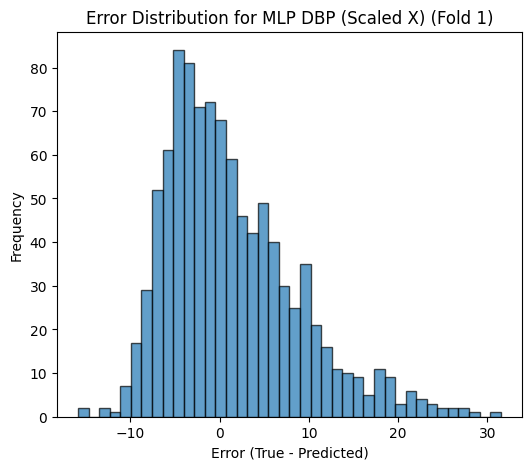

                         Model       R^2       MSE      RMSE       MAE
0  MLP DBP (Scaled X) (Fold 2) -0.153331  66.16848  8.134401  6.494563
                         Model      R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X) (Fold 3) -0.14273  59.939766  7.742078  5.964554
                         Model      R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X) (Fold 3) -0.14273  59.939766  7.742078  5.964554
                         Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X) (Fold 4) -0.060679  61.439354  7.838326  5.871751
                         Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X) (Fold 4) -0.060679  61.439354  7.838326  5.871751
                         Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X) (Fold 5) -0.083147  59.116692  7.688738  5.886714

MLP DBP (Scaled X) Mean ± Std over 5 folds:
R^2: -0.1054 ± 0.0361
MSE: 60.5663 ± 3.2861
RMSE: 7.7796 ± 0.2099
MAE: 5.9799 ± 0.2736
          

In [17]:
# DBP
cross_val_regression(MLPRegressor, X_scaled, dbp.values, label="MLP DBP (Scaled X)", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42}, scale_X=False)

                         Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X) (Fold 1) -0.135544  412.271667  20.304474  16.250755


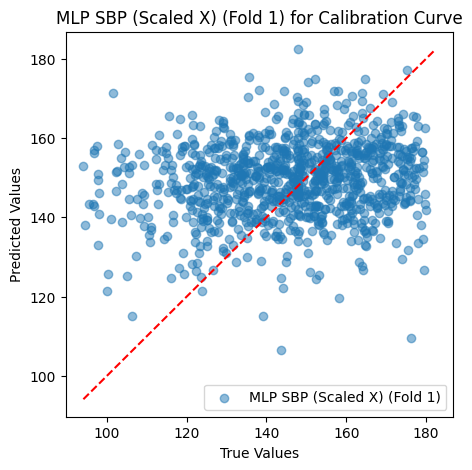

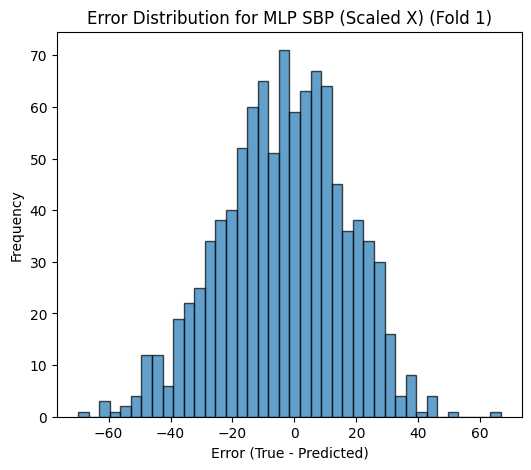

                         Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X) (Fold 2) -0.021151  364.521393  19.092443  15.552017
                         Model      R^2         MSE      RMSE        MAE
0  MLP SBP (Scaled X) (Fold 3) -0.02208  387.602417  19.68762  15.475836
                         Model      R^2         MSE      RMSE        MAE
0  MLP SBP (Scaled X) (Fold 3) -0.02208  387.602417  19.68762  15.475836
                         Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X) (Fold 4)  0.011722  354.985382  18.841055  15.234064
                         Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X) (Fold 4)  0.011722  354.985382  18.841055  15.234064
                         Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X) (Fold 5)  0.032319  352.517334  18.775444  15.268515

MLP SBP (Scaled X) Mean ± Std over 5 folds:
R^2: -0.0269 ± 0.0581
MSE: 374.3796 ± 22.6359
RMSE: 19.3402 ± 0

In [18]:
# SBP
cross_val_regression(MLPRegressor, X_scaled, sbp.values, label="MLP SBP (Scaled X)", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42}, scale_X=False)

## Multilayer Perceptron w/ Scaled X and Y

                             Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 1) -0.745131  90.152573  9.494871  7.186352


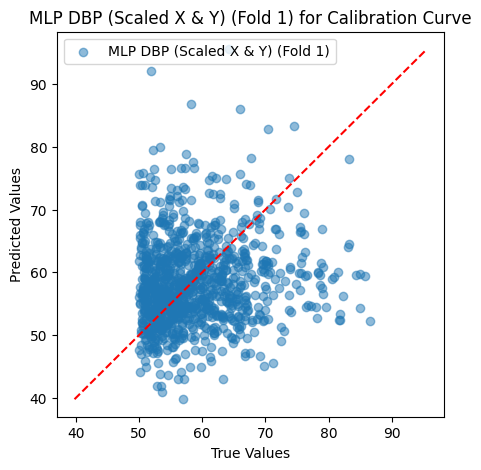

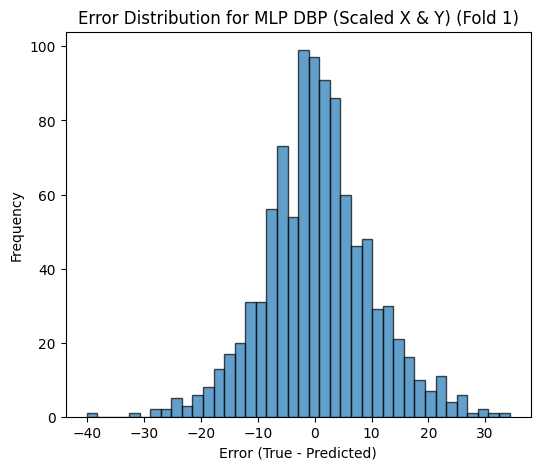

                             Model       R^2         MSE       RMSE      MAE
0  MLP DBP (Scaled X & Y) (Fold 2) -0.867725  107.154434  10.351542  7.82267
                             Model       R^2        MSE      RMSE      MAE
0  MLP DBP (Scaled X & Y) (Fold 3) -0.573653  82.543015  9.085319  6.98157
                             Model       R^2        MSE      RMSE      MAE
0  MLP DBP (Scaled X & Y) (Fold 3) -0.573653  82.543015  9.085319  6.98157
                             Model       R^2         MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 4) -0.776914  102.926918  10.14529  7.620384
                             Model       R^2         MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 4) -0.776914  102.926918  10.14529  7.620384
                             Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Scaled X & Y) (Fold 5) -0.656361  90.401955  9.507995  7.193831

MLP DBP (Scaled X & Y) Mean ± Std over 5 folds:
R^2: -0.7240 ± 0.1011
MSE: 94.6358 ± 

In [19]:
# DBP
cross_val_regression(
    MLPRegressor, X_scaled, dbp.values, label="MLP DBP (Scaled X & Y)",
    model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
    scale_X=False, scale_y=True, y_scaler=dbp_scaler
)

                             Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 1) -0.509485  548.035034  23.410149  18.372736


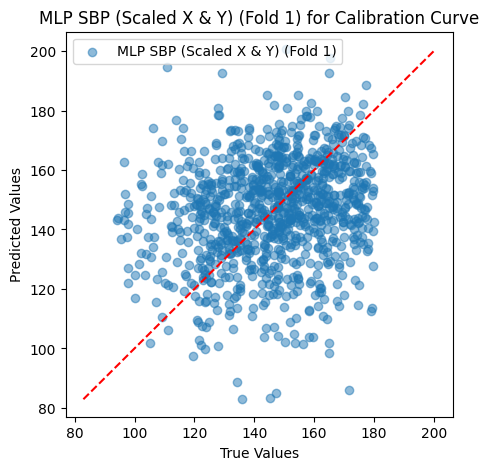

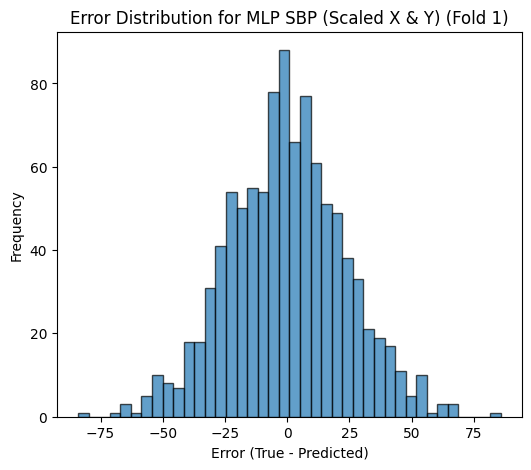

                             Model       R^2         MSE      RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 2) -0.721743  614.612488  24.79138  19.001987
                             Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 3) -0.596831  605.564819  24.608227  18.893682
                             Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 3) -0.596831  605.564819  24.608227  18.893682
                             Model       R^2         MSE      RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 4) -0.504222  540.310059  23.24457  18.387028
                             Model       R^2         MSE      RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 4) -0.504222  540.310059  23.24457  18.387028
                             Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Scaled X & Y) (Fold 5) -0.605879  585.006836  24.186914  18.757187

MLP SBP (Scaled X & Y) Mean ± Std over 5 folds:
R^2: -0.5

In [20]:
# SBP
cross_val_regression(
    MLPRegressor, X_scaled, sbp.values, label="MLP SBP (Scaled X & Y)",
    model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
    scale_X=False, scale_y=True, y_scaler=sbp_scaler
)

# CatBoost

                   Model       R^2        MSE     RMSE       MAE
0  CatBoost DBP (Fold 1) -0.027294  53.069483  7.28488  5.682163


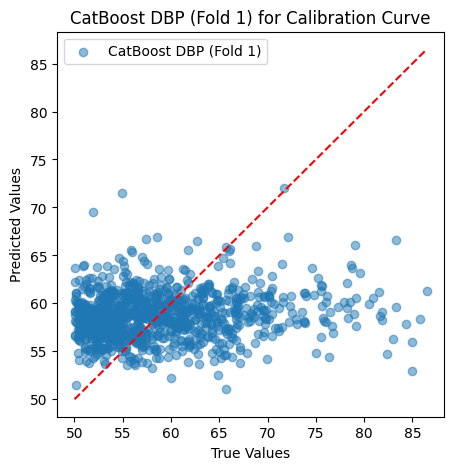

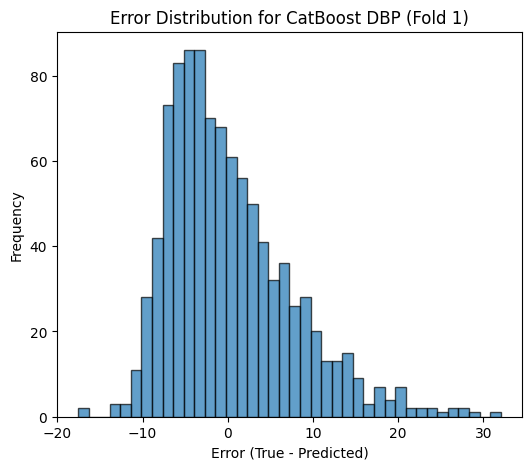

                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 2)  0.006864  56.977815  7.548365  5.914571
                   Model      R^2       MSE      RMSE       MAE
0  CatBoost DBP (Fold 3) -0.03527  54.30313  7.369066  5.760307
                   Model      R^2       MSE      RMSE       MAE
0  CatBoost DBP (Fold 3) -0.03527  54.30313  7.369066  5.760307
                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 4)  0.032992  56.013512  7.484218  5.623913
                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 4)  0.032992  56.013512  7.484218  5.623913
                   Model      R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 5)  0.00023  54.566067  7.386885  5.746756

CatBoost DBP Mean ± Std over 5 folds:
R^2: -0.0045 ± 0.0246
MSE: 54.9860 ± 1.3667
RMSE: 7.4147 ± 0.0921
MAE: 5.7455 ± 0.0976
                   Model      R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 5)  0

In [21]:
from catboost import CatBoostRegressor

# DBP
cross_val_regression(CatBoostRegressor, X.values, dbp.values, label="CatBoost DBP", model_kwargs={'random_state':42, 'verbose':0})

                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 1)  0.101335  326.270052  18.062947  14.350102


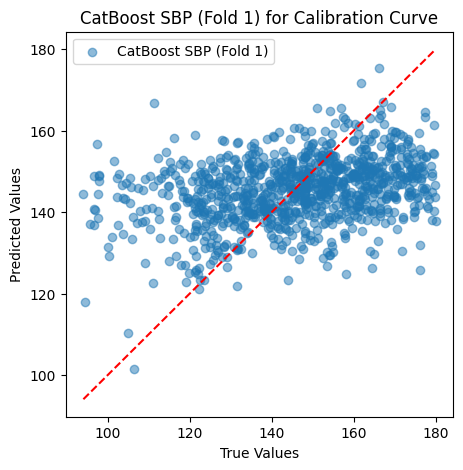

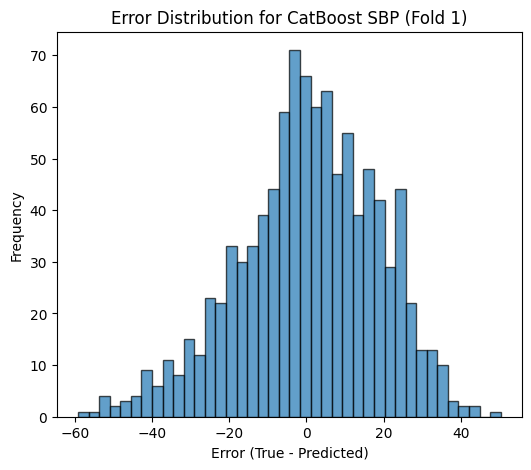

                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 2)  0.130746  310.298657  17.615296  14.119187
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 3)  0.131215  329.468563  18.151269  14.501438
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 3)  0.131215  329.468563  18.151269  14.501438
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 4)  0.118353  316.683821  17.795612  14.161977
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 4)  0.118353  316.683821  17.795612  14.161977
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 5)  0.090107  331.465795  18.206202  14.528976

CatBoost SBP Mean ± Std over 5 folds:
R^2: 0.1144 ± 0.0163
MSE: 322.8374 ± 8.0659
RMSE: 17.9663 ± 0.2251
MAE: 14.3323 ± 0.1685
                   Model       R^2         M

In [22]:
# SBP
cross_val_regression(CatBoostRegressor, X.values, sbp.values, label="CatBoost SBP", model_kwargs={'random_state':42, 'verbose':0})